In [146]:
!pip install matplotlib
!pip install pandas
!pip install openpyxl

In [147]:
from dotenv import load_dotenv
import os
import requests
import matplotlib.pyplot as plt
import pandas as pd
load_dotenv()

False

In [148]:
os.environ['riot_api_key'] = '' #Input your own Riot Development Key

In [149]:
api_key = os.environ.get("riot_api_key") #Change Name and tag here
gameName = "Shaolin Reject"
tagLine = "Shao"

In [150]:
trait_counts = { #Code Name Traits vs Trait Names
    "Academy": 0,#
    "Ambassador": 0, #Emissary
    "Ambusher": 0,#
    "Bruiser": 0, #
    "Cabal": 0,#Blackrose
    "Challenger": 0, #Quickstriker
    "Crime": 0, #Chem baron
    "Experiment": 0, #
    "Family": 0, #
    "Form Swapper": 0, #
    "Hextech": 0, #Automata
    "Hoverboard": 0,#Firelights
    "Infused": 0, #Dominator
    "Invoker": 0, #Visionary
    "Martialist": 0,#Artillerist
    "Pugilist": 0, #Pitfighter
    "Rebel": 0,#
    "Scrap": 0, #
    "Sniper": 0, #
    "Sorceror": 0, #
    "Squad": 0, #Enforcers
    "Titan": 0, #Sentinel
    "Warband": 0, #Conquerers
    "Watcher": 0 #
}

trait_name_mapping = {
    "Academy": "Academy",
    "Ambassador": "Emissary",
    "Ambusher": "Ambusher",
    "Bruiser": "Bruiser",
    "Cabal": "Blackrose",
    "Challenger": "Quickstriker",
    "Crime": "Chem baron",
    "Experiment": "Experiment",
    "Family": "Family",
    "Form Swapper": "Form Swapper",
    "Hextech": "Automata",
    "Hoverboard": "Firelights",
    "Infused": "Dominator",
    "Invoker": "Visionary",
    "Martialist": "Artillerist",
    "Pugilist": "Pitfighter",
    "Rebel": "Rebel",
    "Scrap": "Scrap",
    "Sniper": "Sniper",
    "Sorceror": "Sorceror",
    "Squad": "Enforcers",
    "Titan": "Sentinel",
    "Warband": "Conquerers",
    "Watcher": "Watcher"
}


In [151]:
def get_puuid(gameName = None, tagLine = None, api_key = None): #Getting the player unique id based on name + tag
    link = f"https://americas.api.riotgames.com/riot/account/v1/accounts/by-riot-id/{gameName}/{tagLine}?api_key={api_key}"
    response = requests.get(link)
    return response.json()['puuid']

In [152]:
puuid = get_puuid(gameName = gameName, tagLine = tagLine, api_key = api_key)

In [153]:
def get_matches(puuid = None, api_key = None): #Getting 20 most recent matches
    link = f"https://americas.api.riotgames.com/tft/match/v1/matches/by-puuid/{puuid}/ids?start=0&count=20&api_key={api_key}"
    response = requests.get(link)
    return response.json()

In [154]:
match_array = (get_matches(puuid, api_key))

In [155]:
def get_match_data(matchID = None, api_key = None): #Getting all participants data
    link = f"https://americas.api.riotgames.com/tft/match/v1/matches/{matchID}?api_key={api_key}"
    response = requests.get(link)
    return [response.json()['info']['participants']]

In [156]:
#There is a requirement of 20 matches for the data to be not skewed (Within last month? or 2 weeks?)
for i in range (0,19):
    players = (get_match_data(match_array[i], api_key)) #Getting players in the match 
    
    for player_group in players: #Checking each player in match to find where the target player is. 
        for player in player_group: #If found then taking the trait data and checking to see if won
            if player['riotIdGameName'] == gameName:
                traitData = player['traits']
                placement = player['placement']
    traitData
    for trait in traitData: #O(n) number of traits that the person used in the game
        for traits in trait_counts: #O(24) number of traits total in game 
            if (trait['name'] == ('TFT13_' + traits) and trait['tier_current'] >= 1):
                if(placement >= 4):
                    trait_counts[traits] -= trait['tier_current'] * ((placement)) 
                else:
                    trait_counts[traits] += trait['tier_current'] * (9-placement) 

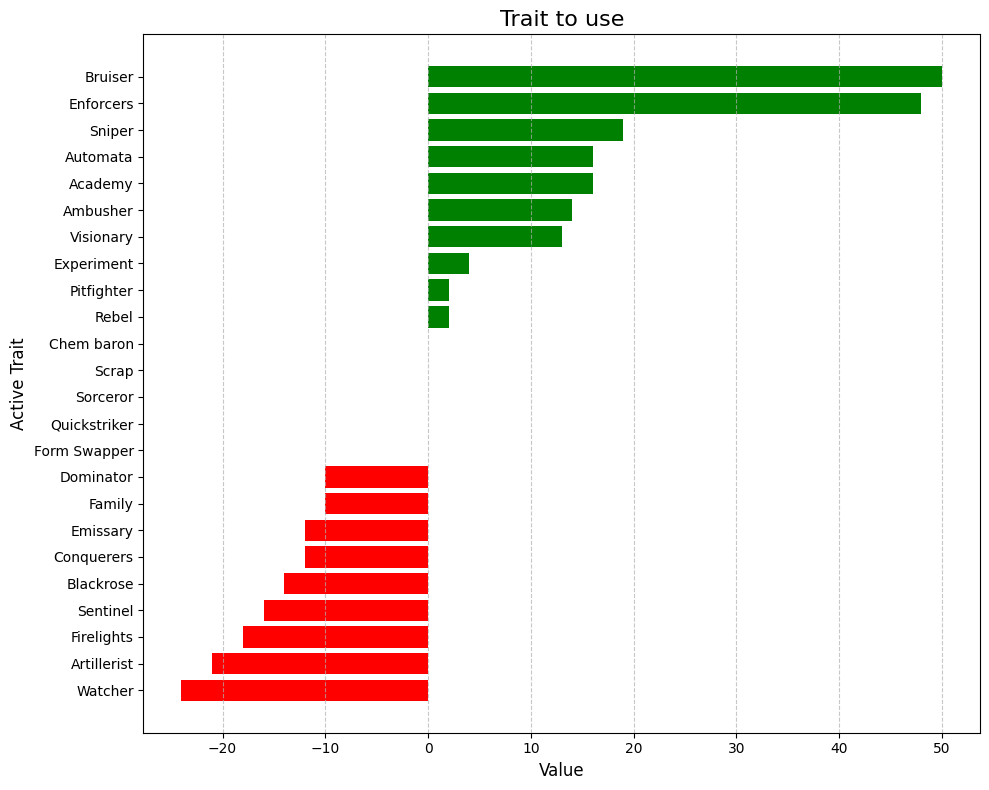

   Trait (Code Name)  Value Trait (Actual Name)
23           Watcher    -24             Watcher
14        Martialist    -21         Artillerist
11        Hoverboard    -18          Firelights
21             Titan    -16            Sentinel
4              Cabal    -14           Blackrose
22           Warband    -12          Conquerers
1         Ambassador    -12            Emissary
8             Family    -10              Family
12           Infused    -10           Dominator
9       Form Swapper      0        Form Swapper
5         Challenger      0        Quickstriker
19          Sorceror      0            Sorceror
17             Scrap      0               Scrap
6              Crime      0          Chem baron
16             Rebel      2               Rebel
15          Pugilist      2          Pitfighter
7         Experiment      4          Experiment
13           Invoker     13           Visionary
2           Ambusher     14            Ambusher
0            Academy     16             

In [157]:
# Create the DataFrame
trait_table = pd.DataFrame(list(trait_counts.items()), columns=["Trait (Code Name)", "Value"])
trait_table["Trait (Actual Name)"] = trait_table["Trait (Code Name)"].replace(trait_name_mapping)

# Sort the DataFrame for better visualization
trait_table = trait_table.sort_values(by="Value", ascending=True)

# Plot the horizontal bar chart
plt.figure(figsize=(10, 8))
colors = trait_table["Value"].apply(lambda x: "green" if x > 0 else "red")  # Color-code positive/negative
plt.barh(trait_table["Trait (Actual Name)"], trait_table["Value"], color=colors)

# Add titles and labels
plt.title("Trait to use", fontsize=16)
plt.xlabel("Value", fontsize=12)
plt.ylabel("Active Trait", fontsize=12)

# Add gridlines for better readability
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()  # Adjust layout to avoid label cutoff
plt.show()

print(trait_table)